In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from pandas.api.types import CategoricalDtype

In [3]:
df = pd.read_csv('student_performance.csv')

In [5]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [7]:
# Set Order Category Column
category_order = ['Low', 'Medium', 'High']
cat_type = CategoricalDtype(categories=category_order, ordered=True)
df['ParentalSupport'] = df['ParentalSupport'].astype(cat_type)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   StudentID                  10 non-null     int64   
 1   Name                       10 non-null     object  
 2   Gender                     10 non-null     object  
 3   AttendanceRate             10 non-null     int64   
 4   StudyHoursPerWeek          10 non-null     int64   
 5   PreviousGrade              10 non-null     int64   
 6   ExtracurricularActivities  10 non-null     int64   
 7   ParentalSupport            10 non-null     category
 8   FinalGrade                 10 non-null     int64   
dtypes: category(1), int64(6), object(2)
memory usage: 914.0+ bytes


<Axes: xlabel='StudyHoursPerWeek', ylabel='FinalGrade'>

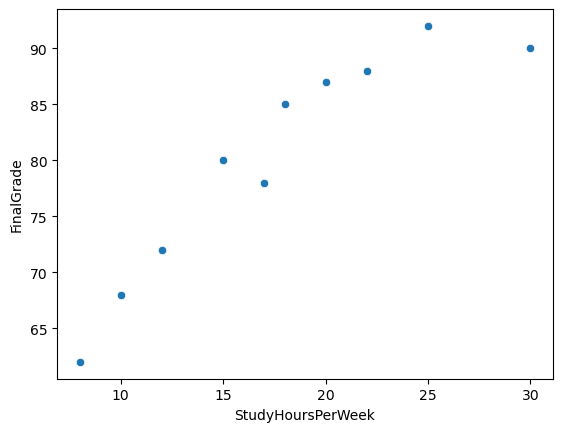

In [11]:
# Scatter Plot Study Hours Per Week vs Final Grade
sns.scatterplot(x="StudyHoursPerWeek",
                y="FinalGrade",
                data=df)

<Axes: xlabel='StudyHoursPerWeek', ylabel='FinalGrade'>

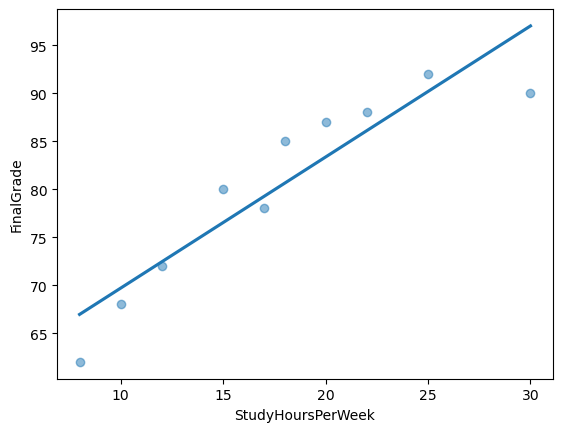

In [13]:
# Adding trend line Study Hours Per Week vs Final Grade
sns.regplot(x='StudyHoursPerWeek',
         y='FinalGrade',
         data=df,
         ci=None,
         scatter_kws={'alpha': 0.5}) 


The results indicates more study hours, better final grades.

# Predictions

In [17]:
# Getting prediction of FinalGrade according of StudyHoursPerWeek
StudyHoursPerWeek_vs_FinalGrade = ols("FinalGrade ~ StudyHoursPerWeek", data = df)
StudyHoursPerWeek_vs_FinalGrade = StudyHoursPerWeek_vs_FinalGrade.fit()
print('The slope and intercept of Final Grade according of Study Hours Per Week') 
print(StudyHoursPerWeek_vs_FinalGrade.params)


The slope and intercept of Final Grade according of Study Hours Per Week
Intercept            56.021322
StudyHoursPerWeek     1.366027
dtype: float64


In [19]:
# Creating a dataframe with preidctions
StudyHoursPerWeek_vs_FinalGrade_pred = ols("FinalGrade ~ StudyHoursPerWeek", data = df).fit()
explanatory_data = pd.DataFrame(
                                  {"StudyHoursPerWeek": np.arange(20, 31)}
                                )
StudyHoursPerWeek_vs_FinalGrade_pred_data = explanatory_data.assign(
                                                                    FinalGrade = StudyHoursPerWeek_vs_FinalGrade_pred.predict(explanatory_data)
                                                                )
print(StudyHoursPerWeek_vs_FinalGrade_pred_data)


    StudyHoursPerWeek  FinalGrade
0                  20   83.341862
1                  21   84.707889
2                  22   86.073916
3                  23   87.439943
4                  24   88.805970
5                  25   90.171997
6                  26   91.538024
7                  27   92.904051
8                  28   94.270078
9                  29   95.636105
10                 30   97.002132


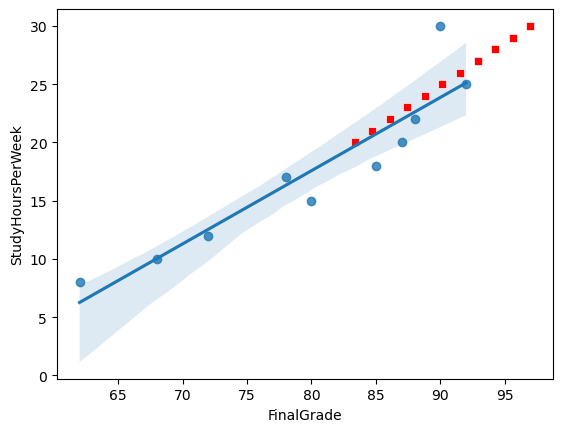

In [21]:
# Visualize the predictions
fig = plt.figure()
sns.regplot(x="FinalGrade",
            y="StudyHoursPerWeek",
            #ci=None,
            data=df)
sns.scatterplot(x="FinalGrade",
                y="StudyHoursPerWeek",
                data=StudyHoursPerWeek_vs_FinalGrade_pred_data,
                color="red",
                marker="s")
plt.show()

# Prediction using fitted values

Instead of generate a new dataframe to predict the values we are using the fitted values to generate the predictions

In [25]:
# Getting prediction of FinalGrade according of StudyHoursPerWeek
StudyHoursPerWeek_vs_FinalGrade = ols("FinalGrade ~ StudyHoursPerWeek", data = df)
StudyHoursPerWeek_vs_FinalGrade = StudyHoursPerWeek_vs_FinalGrade.fit()
predicted_data = StudyHoursPerWeek_vs_FinalGrade.fittedvalues
print('Prediction using .fittedvalues')
print(predicted_data)

print('Residuals using .resid')
print(StudyHoursPerWeek_vs_FinalGrade.resid)

Prediction using .fittedvalues
0    76.511727
1    83.341862
2    69.681592
3    90.171997
4    80.609808
5    97.002132
6    66.949538
7    79.243781
8    72.413646
9    86.073916
dtype: float64
Residuals using .resid
0    3.488273
1    3.658138
2   -1.681592
3    1.828003
4    4.390192
5   -7.002132
6   -4.949538
7   -1.243781
8   -0.413646
9    1.926084
dtype: float64


In [27]:
explanatory_data = df['StudyHoursPerWeek']
predicted_data = StudyHoursPerWeek_vs_FinalGrade.predict(explanatory_data)
print('Prediction fitted manual the original dataset')
print(predicted_data)


print('Residuals increasing the original dataset from the predicted data')
print(df['FinalGrade'] - predicted_data)

Prediction fitted manual the original dataset
0    76.511727
1    83.341862
2    69.681592
3    90.171997
4    80.609808
5    97.002132
6    66.949538
7    79.243781
8    72.413646
9    86.073916
dtype: float64
Residuals increasing the original dataset from the predicted data
0    3.488273
1    3.658138
2   -1.681592
3    1.828003
4    4.390192
5   -7.002132
6   -4.949538
7   -1.243781
8   -0.413646
9    1.926084
dtype: float64


#### The previous snip codes generates the same predictions (fitted values, or fit the original dataset manual)

In [30]:
print(StudyHoursPerWeek_vs_FinalGrade.summary())

                            OLS Regression Results                            
Dep. Variable:             FinalGrade   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     48.49
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           0.000117
Time:                        20:05:16   Log-Likelihood:                -27.012
No. Observations:                  10   AIC:                             58.02
Df Residuals:                       8   BIC:                             58.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            56.0213      3.69

C:\Users\Rafael\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Category OLS

In [33]:
# FInding the slope and the intercept of the trend line, generate equation
# Study Hours Per Week vs Final Grade
StudyHoursPerWeek_vs_FinalGrade = ols("FinalGrade ~ StudyHoursPerWeek", data = df)
StudyHoursPerWeek_vs_FinalGrade = StudyHoursPerWeek_vs_FinalGrade.fit()
print(StudyHoursPerWeek_vs_FinalGrade.params)
print()
print(f"Equation : y = {StudyHoursPerWeek_vs_FinalGrade.params[0]} + x * {StudyHoursPerWeek_vs_FinalGrade.params[1]}")


Intercept            56.021322
StudyHoursPerWeek     1.366027
dtype: float64

Equation : y = 56.02132196162046 + x * 1.3660270078180539


In [35]:
# FInding the slope and the intercept of the trend line
# Parental Support vs Final Grade
ParentalSupport_vs_FinalGrade = ols("FinalGrade ~ ParentalSupport", data = df)
ParentalSupport_vs_FinalGrade = ParentalSupport_vs_FinalGrade.fit()
print(ParentalSupport_vs_FinalGrade.params)
print()
print(f"Equation Medium : y = {round(ParentalSupport_vs_FinalGrade.params[0],2)} + x * {round(ParentalSupport_vs_FinalGrade.params[1],2)}")
print(f"Equation High : y = {round(ParentalSupport_vs_FinalGrade.params[0],2)} + x * {round(ParentalSupport_vs_FinalGrade.params[2],2)}")
print()
print(f"When the Parental Support is Low the Final Grade is {round(ParentalSupport_vs_FinalGrade.params[0],2)}")
print(f"When the Parental Support is Medium the Final Grade is {round(ParentalSupport_vs_FinalGrade.params[0],2)} + {round(ParentalSupport_vs_FinalGrade.params[1],2)}")
print(f"When the Parental Support is High the Final Grade is {round(ParentalSupport_vs_FinalGrade.params[0],2)} + {round(ParentalSupport_vs_FinalGrade.params[2],2)}")

Intercept                    67.333333
ParentalSupport[T.Medium]    16.000000
ParentalSupport[T.High]      20.166667
dtype: float64

Equation Medium : y = 67.33 + x * 16.0
Equation High : y = 67.33 + x * 20.17

When the Parental Support is Low the Final Grade is 67.33
When the Parental Support is Medium the Final Grade is 67.33 + 16.0
When the Parental Support is High the Final Grade is 67.33 + 20.17


There are two slopes because two trendlines is generated. Check the graph below.

<Axes: xlabel='ParentalSupport', ylabel='FinalGrade'>

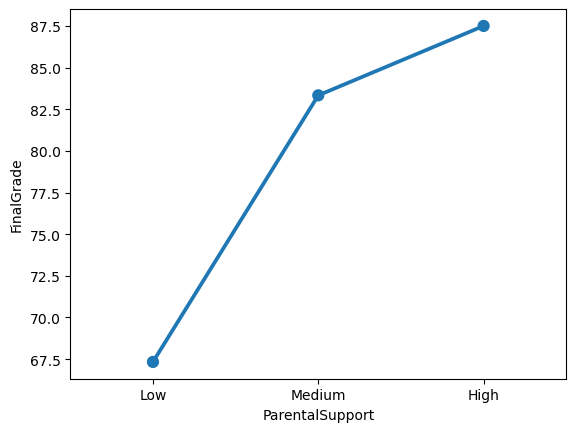

In [41]:
sns.pointplot(
    x='ParentalSupport',
    y='FinalGrade',
    data=df,
    errorbar=None, 
    capsize=0.2
)

# Full Example taiwan real estate dataset

In [44]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate.csv')

In [46]:
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


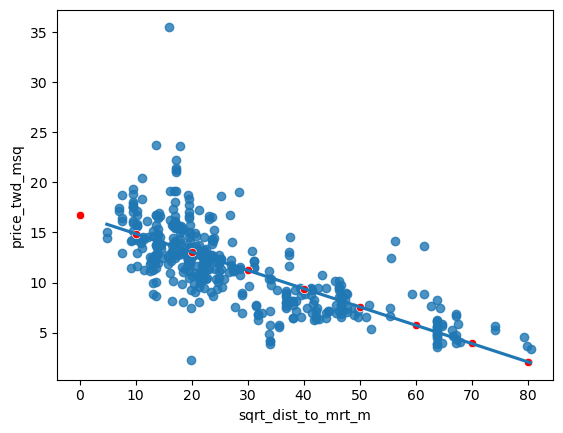

In [48]:
## Use square root as scaling method
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2}) # This is not necessary because the fitted model generated only using sqrt_dist_to_mrt_m
                                                                             # Also the sqrt_dist_to_mrt_m is related dist_to_mrt_m

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()
